# Importing base libraries

In [1]:
# Preparing and importing everything we need in this lab
from scipy.io import arff
import pandas as pd
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Preparing data

## Loading ARFF 

In [2]:
# Data
ARFF_FILE = 'diabetes.arff' # file is in the same folder, as jupyter is ran, and ipynb file

arff_data = arff.loadarff(ARFF_FILE)
df = pd.DataFrame(arff_data[0])
df.head(5) # first 5 entities

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


## Converting 

In [3]:
target = df['class']
data = df.drop(columns=['class'])
target = target.astype('str')

In [4]:
# plot confusion matrix

In [5]:
from sklearn import dummy, metrics

baseline = dummy.DummyClassifier(strategy='most_frequent')
baseline.fit(data, target)
base_predictions = baseline.predict(data)


## Helper for plot

In [6]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    pyplot.imshow(matrix, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black")

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

# Baseline

Accuracy = 0.651
                    precision    recall  f1-score   support

b'tested_negative'       0.65      1.00      0.79       500
b'tested_positive'       0.00      0.00      0.00       268

         micro avg       0.65      0.65      0.65       768
         macro avg       0.33      0.50      0.39       768
      weighted avg       0.42      0.65      0.51       768

Confusion matrix, without normalization


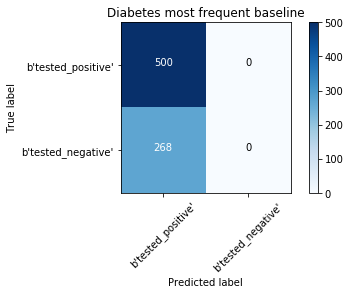

In [8]:
baseline = dummy.DummyClassifier(strategy='most_frequent')
baseline.fit (data, target)
base_predictions = baseline.predict(data)

accuracy = metrics.accuracy_score(target, base_predictions)
print ("Accuracy = {:.3f}".format(accuracy))

print(metrics.classification_report(target, base_predictions))

plot_confusion_matrix(metrics.confusion_matrix(target, base_predictions), 
                        classes=target.unique(), 
                        title='Diabetes most frequent baseline')